In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

In [2]:
import matplotlib.pyplot as plt


In [3]:
#pip install wordcloud

In [4]:
from wordcloud import WordCloud

In [5]:
# creating empty reviews list 
joker_movie_reviews=[]

In [17]:
for i in range (1,21):
    ip=[]
    url='https://www.imdb.com/title/tt7286456/reviews?ref_=tt_sa_3'+str(i)
    response = requests.get(url)
    soup=bs(response.content,"html.parser")
    #reviews=soup.find_all("span",attrs={"class","lister-item mode-detail imdb-user-review  with-spoiler"})
    reviews=soup.find_all("div",attrs={"text show-more__control"})

    for i in range (len(reviews)):
        ip.append(reviews[i].text)
    joker_movie_reviews=joker_movie_reviews+ip

In [18]:
joker_movie_reviews

["A pretty good movie; not quite the masterpiece that some would have you believe, it's too derivative for that, but it's still worth a watch and there's no denying that Joaquin Phoenix delivers an excellent performance in the title role. My main bone of contention with this film is that it really doesn't need to be tied up to the whole superhero genre, setting up the rivalry with Batman for at least half the running time; it's a better film than that and would have served better as a stand-alone psychological portrait of mental breakdown. Films this seems to have been inspired by include THE MECHANIC, THE KING OF COMEDY and of course TAXI DRIVER.",
 "Gotham is in dire difficulties like New York City back in the 70's. Arthur Fleck (Joaquin Phoenix) is a mentally unstable clown. He laughs uncontrollably in stressful times. He gets beaten and robbed by a group of youths. He gets fired from his job. He lives with his unstable sick mom (Frances Conroy) who worked for Thomas Wayne and claim

In [19]:
with open('joker_movie_reviews.txt','w',encoding='utf8') as output:
    output.write(str(joker_movie_reviews))
    

In [21]:
#joining all reviews into a single paragraph
ip_rev_string=" ".join(joker_movie_reviews)
ip_rev_string

'A pretty good movie; not quite the masterpiece that some would have you believe, it\'s too derivative for that, but it\'s still worth a watch and there\'s no denying that Joaquin Phoenix delivers an excellent performance in the title role. My main bone of contention with this film is that it really doesn\'t need to be tied up to the whole superhero genre, setting up the rivalry with Batman for at least half the running time; it\'s a better film than that and would have served better as a stand-alone psychological portrait of mental breakdown. Films this seems to have been inspired by include THE MECHANIC, THE KING OF COMEDY and of course TAXI DRIVER. Gotham is in dire difficulties like New York City back in the 70\'s. Arthur Fleck (Joaquin Phoenix) is a mentally unstable clown. He laughs uncontrollably in stressful times. He gets beaten and robbed by a group of youths. He gets fired from his job. He lives with his unstable sick mom (Frances Conroy) who worked for Thomas Wayne and clai

In [22]:
import nltk

In [23]:
#removing unwanted symbols incase if exists
ip_rev_string=re.sub('[^A-Za-z' ']+', ' ', ip_rev_string).lower()
ip_rev_string=re.sub('[0-9' ']+', ' ', ip_rev_string)

In [26]:
# words that contained in mi power bank reviews
ip_reviews_words = ip_rev_string.split(" ")

In [27]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer


In [28]:
vectorizer = TfidfVectorizer(ip_reviews_words, use_idf=True,ngram_range=(1, 3))


C:\Users\chinni\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['a', 'pretty', 'good', 'movie', 'not', 'quite', 'the', 'masterpiece', 'that', 'some', 'would', 'have', 'you', 'believe', 'it', 's', 'too', 'derivative', 'for', 'that', 'but', 'it', 's', 'still', 'worth', 'a', 'watch', 'and', 'there', 's', 'no', 'denying', 'that', 'joaquin', 'phoenix', 'delivers', 'an', 'excellent', 'performance', 'in', 'the', 'title', 'role', 'my', 'main', 'bone', 'of', 'contention', 'with', 'this', 'film', 'is', 'that', 'it', 'really', 'doesn', 't', 'need', 'to', 'be', 'tied', 'up', 'to', 'the', 'whole', 'superhero', 'genre', 'setting', 'up', 'the', 'rivalry', 'with', 'batman', 'for', 'at', 'least', 'half', 'the', 'running', 'time', 'it', 's', 'a', 'better', 'film', 'than', 'that', 'and', 'would', 'have', 'served', 'better', 'as', 'a', 'stand', 'alone', 'psychological', 'portrait', 'of', 'mental', 'breakdown', 'films', 'this', 'seems', 'to', 'have', 'been', 'inspired

In [29]:
x = vectorizer.fit_transform(ip_reviews_words)

In [30]:
with open("C:\data\data science\Study material\Text Mining and sentiment analysis\Datasets NLP\stop.txt","r") as sw:
    stop_words = sw.read()


In [31]:
stop_words=stop_words.split("\n")

In [33]:
stop_words.extend(["bad","boring","not good"])

In [34]:
ip_reviews_words=[w for w in ip_reviews_words if not w in stop_words]

In [35]:
#joining all reviews into single paragraph
ip_rev_string=" ".join (ip_reviews_words)

In [57]:
ip_rev_string

' bank mah type output apt charging iphone type lighting cable mah doesn option type option ordered don option replacement return replace defect partially mistake technically sound didn read back compatible iphone wrong provide return option product amazon disappointed ll feedback back exchange mi pocket back request bank solid sturdy usage changed mind completely light blinking warp charger night charging hours reached iiird cell taking hours completely bad version powerbank mi charging samsung full speeds max speed phone supports confirm genuine product official website mi digit authentication code box doubt mi genuine product checked searching product checked mi website reply product verified means genuine mi providing facility customer chey products online disappointed continues led notification charging blinks seconds don times delayed confused charging charging bank battery discharging received fake knock mi bank check product fake mine hologram box queried times bought brand buy

In [36]:
#word cloud can perform on the string inputs
#corpus level word cloud

In [41]:
wordcloud_ip =WordCloud(
                    background_color='black',
                    width=2000,
                    height=1000).generate (ip_rev_string)

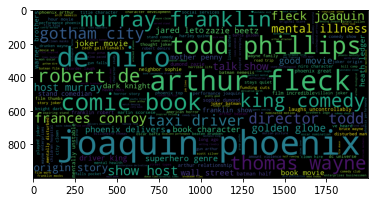

In [42]:
plt.imshow(wordcloud_ip)

In [43]:
#positive words#
with open("C:\data\data science\Study material\Text Mining and sentiment analysis\Datasets NLP\positive-words.txt","r") as pos:
    poswords=pos.read().split("\n")

In [44]:
#positive word cloud
#choosing the only words which are present in positive words
ip_pos_in_pos=" ".join ([w for w in ip_reviews_words if w in poswords])

In [45]:
wordcloud_pos_in_pos=WordCloud(
                            background_color="black",
                            width=1500,
                            height=1000).generate (ip_pos_in_pos)

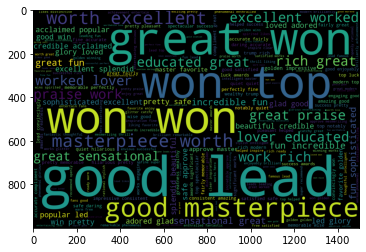

In [46]:
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)

In [47]:
#negative words#
with open(r"C:\data\data science\Study material\Text Mining and sentiment analysis\Datasets NLP\negative-words.txt","r") as neg:
    negwords=neg.read().split("\n")

In [48]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])


In [49]:
wordcloud_neg_in_neg=WordCloud(
                            background_color="black",
                            width=1500,
                            height=1000).generate (ip_neg_in_neg)

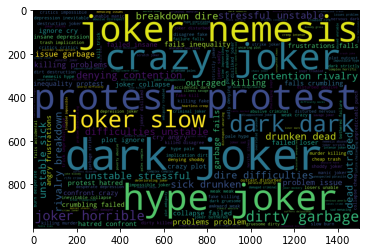

In [50]:
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)

In [51]:
#word cloud with bigram
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [52]:
WNL=nltk.WordNetLemmatizer()

In [53]:
#Lowercase and tokenize
text=ip_rev_string.lower()

In [55]:
#remove single quotes early since it causes problem with the token
text=text.replace("'","")

In [56]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

In [57]:
text1

<Text: pretty good movie masterpiece derivative worth watch denying...>

In [58]:
#remove extra chars and remove stop words
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]


In [60]:
# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

In [62]:
nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)


[('pretty', 'good'), ('good', 'movie'), ('movie', 'masterpiece'), ('masterpiece', 'derivative'), ('derivative', 'worth'), ('worth', 'watch'), ('watch', 'denying'), ('denying', 'joaquin'), ('joaquin', 'phoenix'), ('phoenix', 'delivers'), ('delivers', 'excellent'), ('excellent', 'performance'), ('performance', 'title'), ('title', 'role'), ('role', 'main'), ('main', 'bone'), ('bone', 'contention'), ('contention', 'film'), ('film', 'doesn'), ('doesn', 'tied'), ('tied', 'superhero'), ('superhero', 'genre'), ('genre', 'setting'), ('setting', 'rivalry'), ('rivalry', 'batman'), ('batman', 'half'), ('half', 'running'), ('running', 'film'), ('film', 'served'), ('served', 'stand'), ('stand', 'psychological'), ('psychological', 'portrait'), ('portrait', 'mental'), ('mental', 'breakdown'), ('breakdown', 'film'), ('film', 'inspired'), ('inspired', 'include'), ('include', 'mechanic'), ('mechanic', 'king'), ('king', 'comedy'), ('comedy', 'taxi'), ('taxi', 'driver'), ('driver', 'gotham'), ('gotham', 'd

In [63]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)


['pretty good', 'good movie', 'movie masterpiece', 'masterpiece derivative', 'derivative worth', 'worth watch', 'watch denying', 'denying joaquin', 'joaquin phoenix', 'phoenix delivers', 'delivers excellent', 'excellent performance', 'performance title', 'title role', 'role main', 'main bone', 'bone contention', 'contention film', 'film doesn', 'doesn tied', 'tied superhero', 'superhero genre', 'genre setting', 'setting rivalry', 'rivalry batman', 'batman half', 'half running', 'running film', 'film served', 'served stand', 'stand psychological', 'psychological portrait', 'portrait mental', 'mental breakdown', 'breakdown film', 'film inspired', 'inspired include', 'include mechanic', 'mechanic king', 'king comedy', 'comedy taxi', 'taxi driver', 'driver gotham', 'gotham dire', 'dire difficulty', 'difficulty york', 'york city', 'city back', 'back arthur', 'arthur fleck', 'fleck joaquin', 'joaquin phoenix', 'phoenix mentally', 'mentally unstable', 'unstable clown', 'clown laugh', 'laugh u

In [64]:

# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_


{'pretty good': 2226,
 'good movie': 1188,
 'movie masterpiece': 1861,
 'masterpiece derivative': 1725,
 'derivative worth': 687,
 'worth watch': 3104,
 'watch denying': 3010,
 'denying joaquin': 670,
 'joaquin phoenix': 1446,
 'phoenix delivers': 2131,
 'delivers excellent': 658,
 'excellent performance': 876,
 'performance title': 2098,
 'title role': 2835,
 'role main': 2401,
 'main bone': 1676,
 'bone contention': 271,
 'contention film': 543,
 'film doesn': 996,
 'doesn tied': 768,
 'tied superhero': 2825,
 'superhero genre': 2753,
 'genre setting': 1154,
 'setting rivalry': 2502,
 'rivalry batman': 2394,
 'batman half': 208,
 'half running': 1256,
 'running film': 2422,
 'film served': 1030,
 'served stand': 2495,
 'stand psychological': 2657,
 'psychological portrait': 2265,
 'portrait mental': 2202,
 'mental breakdown': 1759,
 'breakdown film': 290,
 'film inspired': 1010,
 'inspired include': 1415,
 'include mechanic': 1385,
 'mechanic king': 1739,
 'king comedy': 1531,
 'come

In [65]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])


[('joaquin phoenix', 480), ('arthur fleck', 320), ('de niro', 300), ('todd phillips', 240), ('comic book', 220), ('murray franklin', 200), ('king comedy', 160), ('thomas wayne', 160), ('robert de', 160), ('gotham city', 160), ('taxi driver', 140), ('director todd', 140), ('france conroy', 120), ('show host', 120), ('fleck joaquin', 100), ('origin story', 100), ('mental illness', 100), ('talk show', 80), ('host murray', 80), ('golden globe', 80), ('good movie', 60), ('phoenix delivers', 60), ('superhero genre', 60), ('zazie beetz', 60), ('wall street', 60), ('book character', 60), ('joker movie', 60), ('jared leto', 60), ('driver king', 60), ('mother penny', 60), ('heath ledger', 60), ('dark knight', 60), ('book movie', 60), ('movie ve', 60), ('stand comedian', 60), ('warner brother', 60), ('franklin show', 60), ('batman half', 40), ('mentally unstable', 40), ('laugh uncontrollably', 40), ('arthur relationship', 40), ('neighbor sophie', 40), ('sophie dumond', 40), ('dumond zazie', 40), 

In [75]:

# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
wordCloud.generate_from_frequencies(words_dict)


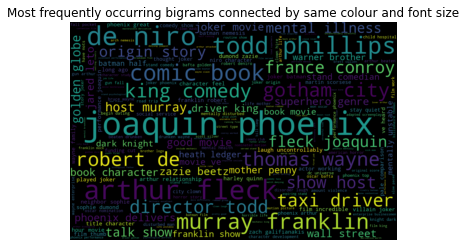

In [76]:
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
